# Gaza Casualties — EDA
**Goal:** Understand casualty patterns over time and across sources.    

**Link:** https://lnkd.in/erMnUg5v

**Key questions:**  
1) How do casualties evolve over time (year/month)?  
2) Which sources report higher injuries/deaths?  
3) Are there heavy outliers that dominate the totals?

## SETUP 

# 1. import Ncessary Libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# 2. Set Style

In [28]:
my_colors=sns.set_palette("RdBu",6)
sns.set(style="whitegrid")
pd.set_option("display.max_columns", 100)

# 3. Read Dataset

In [29]:
df=pd.read_csv('casualties_daily.csv')

# 4. Inspect Dataset

**Snapshot:** The dataset has <R> rows and <C> columns.  
Numeric features show strong skewness; several features are cumulative.  
Missingness is concentrated in a few columns (see next section).


In [30]:
df.head()

,report_date,report_source,report_period,ext_massacres_cum,killed,killed_cum,ext_killed,ext_killed_cum,ext_killed_children_cum,ext_killed_women_cum,injured_cum,ext_injured,ext_injured_cum,ext_civdef_killed_cum,med_killed_cum,ext_med_killed_cum,press_killed_cum,ext_press_killed_cum,killed_recovered,killed_succumbed,killed_truce_new,killed_committee
0,2023-10-07,mohtel,24,0,232.0,232.0,232,232,0,0,1610.0,1610,1610,0,6.0,6,1.0,1,NaN,NaN,NaN,NaN
1,2023-10-08,mohtel,24,0,138.0,370.0,138,370,78,41,1788.0,178,1788,0,NaN,6,1.0,1,NaN,NaN,NaN,NaN
2,2023-10-09,mohtel,24,8,190.0,560.0,190,560,91,61,2271.0,483,2271,0,6.0,6,3.0,3,NaN,NaN,NaN,NaN
3,2023-10-10,mohtel,24,8,340.0,900.0,340,900,260,230,4000.0,1729,4000,0,NaN,6,7.0,7,NaN,NaN,NaN,NaN
4,2023-10-11,gmotel,24,23,200.0,1100.0,200,1100,398,230,5184.0,1184,5184,0,10.0,10,NaN,7,NaN,NaN,NaN,NaN


In [31]:
df.shape

(676, 22)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   report_date              676 non-null    object 
 1   report_source            676 non-null    object 
 2   report_period            676 non-null    int64  
 3   ext_massacres_cum        676 non-null    int64  
 4   killed                   649 non-null    float64
 5   killed_cum               669 non-null    float64
 6   ext_killed               676 non-null    int64  
 7   ext_killed_cum           676 non-null    int64  
 8   ext_killed_children_cum  676 non-null    int64  
 9   ext_killed_women_cum     676 non-null    int64  
 10  injured_cum              661 non-null    float64
 11  ext_injured              676 non-null    int64  
 12  ext_injured_cum          676 non-null    int64  
 13  ext_civdef_killed_cum    676 non-null    int64  
 14  med_killed_cum           1

In [33]:
df.describe()

,report_period,ext_massacres_cum,killed,killed_cum,ext_killed,ext_killed_cum,ext_killed_children_cum,ext_killed_women_cum,injured_cum,ext_injured,ext_injured_cum,ext_civdef_killed_cum,med_killed_cum,ext_med_killed_cum,press_killed_cum,ext_press_killed_cum,killed_recovered,killed_succumbed,killed_truce_new,killed_committee
count,676.000000,676.000000,649.000000,669.000000,676.000000,676.000000,676.000000,676.000000,661.000000,676.000000,676.000000,676.000000,141.000000,676.000000,159.000000,676.000000,133.000000,16.000000,178.000000,9.000000
mean,24.000000,5483.967456,87.895223,39065.101644,91.122781,38835.097633,14914.369822,10129.880178,92244.225416,227.940828,90981.134615,76.210059,471.943262,837.971893,141.779874,162.541420,7.932331,1.812500,57.235955,351.777778
std,7.838367,4056.199681,102.145887,13450.231332,109.155973,13572.932973,4364.824886,2980.971996,30084.079736,305.999186,30979.065947,30.245567,396.223850,469.297834,55.158993,53.936861,13.128846,1.167262,49.392587,199.243430
min,0.000000,0.000000,0.000000,232.000000,0.000000,232.000000,0.000000,0.000000,1610.000000,0.000000,1610.000000,0.000000,6.000000,6.000000,1.000000,1.000000,1.000000,1.000000,0.000000,98.000000
25%,24.000000,2846.000000,32.000000,32623.000000,32.000000,32205.000000,14210.000000,9310.000000,75668.000000,75.750000,74491.500000,48.000000,200.000000,364.000000,111.500000,135.750000,2.000000,1.000000,23.000000,233.000000
50%,24.000000,3559.000000,58.000000,41118.000000,58.000000,40980.000000,16673.000000,11269.000000,95413.000000,134.000000,94793.000000,82.000000,339.000000,885.000000,147.000000,172.000000,4.000000,1.500000,51.500000,279.000000
75%,24.000000,10100.000000,101.000000,48348.000000,104.000000,48346.500000,17861.000000,12316.000000,111780.000000,278.000000,111759.500000,94.000000,500.000000,1155.000000,179.500000,205.000000,9.000000,2.000000,84.500000,534.000000
max,72.000000,12000.000000,756.000000,61599.000000,828.000000,61599.000000,19000.000000,12500.000000,154088.000000,3652.000000,154088.000000,122.000000,1590.000000,1590.000000,238.000000,238.000000,120.000000,5.000000,436.000000,697.000000


In [34]:
df.columns

Index(['report_date', 'report_source', 'report_period', 'ext_massacres_cum',
       'killed', 'killed_cum', 'ext_killed', 'ext_killed_cum',
       'ext_killed_children_cum', 'ext_killed_women_cum', 'injured_cum',
       'ext_injured', 'ext_injured_cum', 'ext_civdef_killed_cum',
       'med_killed_cum', 'ext_med_killed_cum', 'press_killed_cum',
       'ext_press_killed_cum', 'killed_recovered', 'killed_succumbed',
       'killed_truce_new', 'killed_committee'],
      dtype='object')

# 6. Check Duplicates

No Duplicates

In [35]:
sum(df.duplicated())

0

# 7. Check missing values

In [36]:
def check_missing(df):
    missing = df.isna().sum()
    missing = missing[missing > 0]
    missing_df = pd.DataFrame(missing, columns=['missing#'])
    missing_df['missing%'] = missing_df['missing#'] * 100 / len(df)
    display(missing_df)


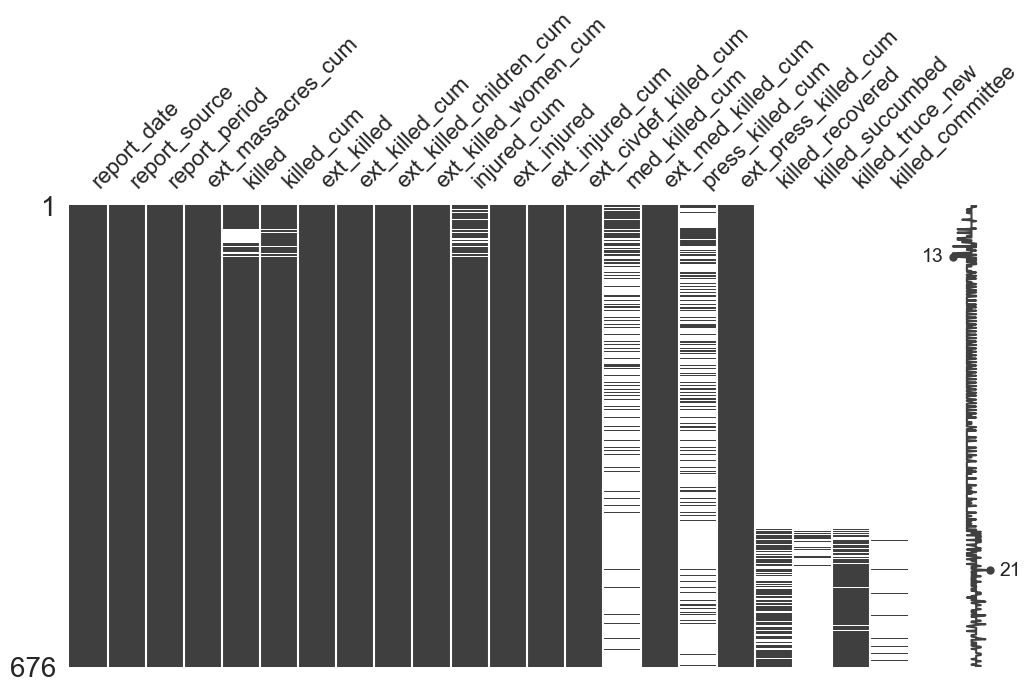

In [37]:
msno.matrix(df, figsize=(12, 6))
plt.show()
#The missing values are not completely random.
#They are mostly MAR (Missing at Random) since they appear in specific columns depending on the type of report.
#Some cases may also be MNAR due to the nature of the events.
#For handling missing values, I will:
#Drop columns with too many missing values
#Fill numerical columns using mean/median, and categorical columns using mode depending on the context.


Missingness is not completely random. Mostly **MAR** (clustered in specific columns).  
Strategy: drop high-NA, fill low-NA numeric by median, categorical by mode.

In [38]:
check_missing(df)
#'med_killed_cum','press_killed_cum','killed_recovered','killed_succumbed','killed_truce_new','killed_committee'>70% , therfore i will drop all column of them
#'killed_cum', 'injured_cum'<3% i will drop the rows with missing values
#killed in the middle i will make a simple imputation with median

,missing#,missing%
killed,27,3.994083
killed_cum,7,1.035503
injured_cum,15,2.218935
med_killed_cum,535,79.142012
press_killed_cum,517,76.479290
killed_recovered,543,80.325444
killed_succumbed,660,97.633136
killed_truce_new,498,73.668639
killed_committee,667,98.668639


# 8. Handle missing 

drop [
    'med_killed_cum',
    'press_killed_cum',
    'killed_recovered',
    'killed_succumbed',
    'killed_truce_new',
    'killed_committee'] this cloumns bec. they have more than 70% missing values

In [39]:
df.drop(columns=[
    'med_killed_cum',
    'press_killed_cum',
    'killed_recovered',
    'killed_succumbed',
    'killed_truce_new',
    'killed_committee'
], axis=1,inplace=True)


check again

In [40]:
check_missing(df)

,missing#,missing%
killed,27,3.994083
killed_cum,7,1.035503
injured_cum,15,2.218935


drop rows of this columns ['killed_cum', 'injured_cum'] bec they have less than 3% of missing values

In [41]:
df.dropna(subset=[ 'killed_cum', 'injured_cum'], inplace=True)

check again

In [42]:
check_missing(df)

,missing#,missing%
killed,15,2.269289


the last column in the middle then i will make simple mutation buy fill the missin values with his median bec median don't sensetive with outliers

In [43]:
df['killed'].fillna(df['killed'].median(), inplace=True)

C:\Users\ashra\AppData\Local\Temp\ipykernel_29960\2594407692.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['killed'].fillna(df['killed'].median(), inplace=True)


Now, data is completly clean

In [44]:
check_missing(df)

,missing#,missing%


In [45]:
print("Post-clean shape:", df.shape)

Post-clean shape: (661, 16)


# Break down the data into Numerical & Categorical to simple analyze

In [46]:
nums_columns=df.select_dtypes('number').columns

cat_columns=df.select_dtypes('object').columns

In [47]:
len(nums_columns)

14

# Description statistics for Numerical columns

In [48]:
df[nums_columns].describe()

,report_period,ext_massacres_cum,killed,killed_cum,ext_killed,ext_killed_cum,ext_killed_children_cum,ext_killed_women_cum,injured_cum,ext_injured,ext_injured_cum,ext_civdef_killed_cum,ext_med_killed_cum,ext_press_killed_cum
count,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000
mean,24.000000,5579.937973,86.001513,39406.883510,88.838124,39406.945537,15125.062027,10269.910741,92244.225416,224.644478,92244.396369,77.406959,852.311649,164.821483
std,7.926939,4050.399821,99.411229,13151.812799,105.244489,13151.817752,4165.889075,2851.255048,30084.079736,301.532222,30084.087397,29.469746,464.519996,52.177334
min,0.000000,0.000000,0.000000,232.000000,0.000000,232.000000,0.000000,0.000000,1610.000000,0.000000,1610.000000,0.000000,6.000000,1.000000
25%,24.000000,2928.000000,32.000000,33037.000000,32.000000,33037.000000,14500.000000,9560.000000,75668.000000,77.000000,75668.000000,65.000000,484.000000,140.000000
50%,24.000000,3580.000000,57.000000,41226.000000,58.000000,41226.000000,16795.000000,11378.000000,95413.000000,134.000000,95413.000000,83.000000,885.000000,173.000000
75%,24.000000,10100.000000,98.000000,48365.000000,102.000000,48365.000000,17861.000000,12316.000000,111780.000000,277.000000,111780.000000,94.000000,1155.000000,205.000000
max,72.000000,12000.000000,756.000000,61599.000000,828.000000,61599.000000,19000.000000,12500.000000,154088.000000,3652.000000,154088.000000,122.000000,1590.000000,238.000000


# Description statistics for Categorical columns

In [49]:
df[cat_columns].describe()

,report_date,report_source
count,661,661
unique,661,2
top,2023-10-07,mohtel
freq,1,640


heir i fill that column of report date is useless therfore i decide to break it down to years , months , day of weeks , days to extract from it insights

In [50]:
df['report_date'] = pd.to_datetime(df['report_date'])
df['year'] = df['report_date'].dt.year
df['month'] = df['report_date'].dt.month
df['dayofweek'] = df['report_date'].dt.dayofweek   # 0=Monday, 6=Sunday
df['day'] = df['report_date'].dt.day

# Some Visualization to make sure this break down useful or i will drop the column

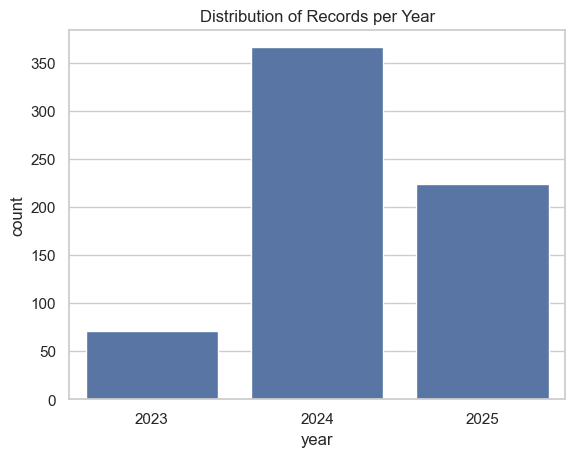

In [51]:
sns.countplot(x=df['year'])
plt.title("Distribution of Records per Year")
plt.show()

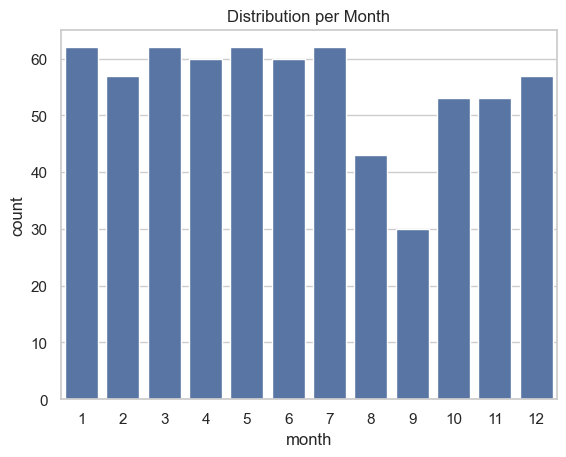

In [52]:
sns.countplot(x=df['month'])
plt.title("Distribution per Month")
plt.show()

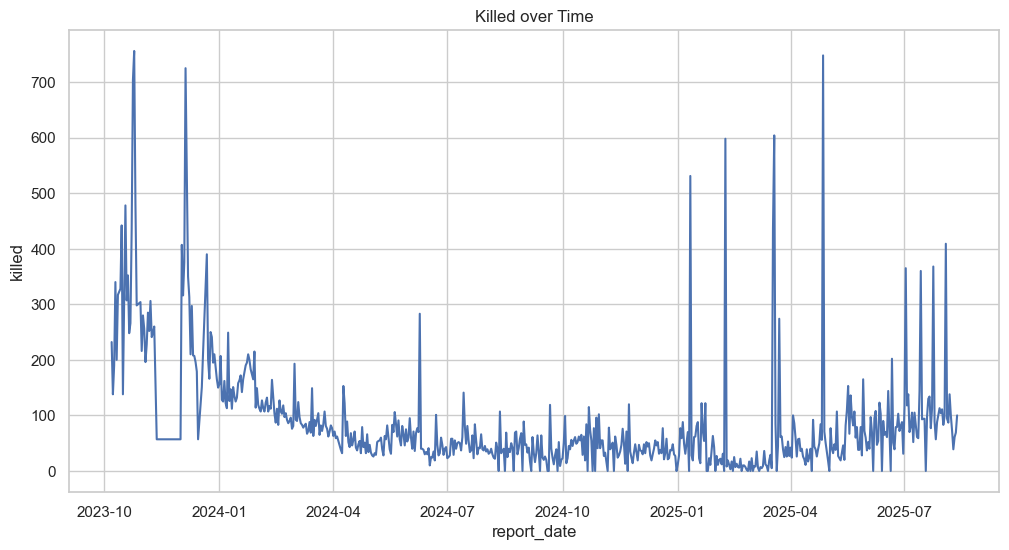

In [53]:
plt.figure(figsize=(12,6))
sns.lineplot(x="report_date", y="killed", data=df)
plt.title("Killed over Time")
plt.show()

# Visualize the relation between year and number of killed

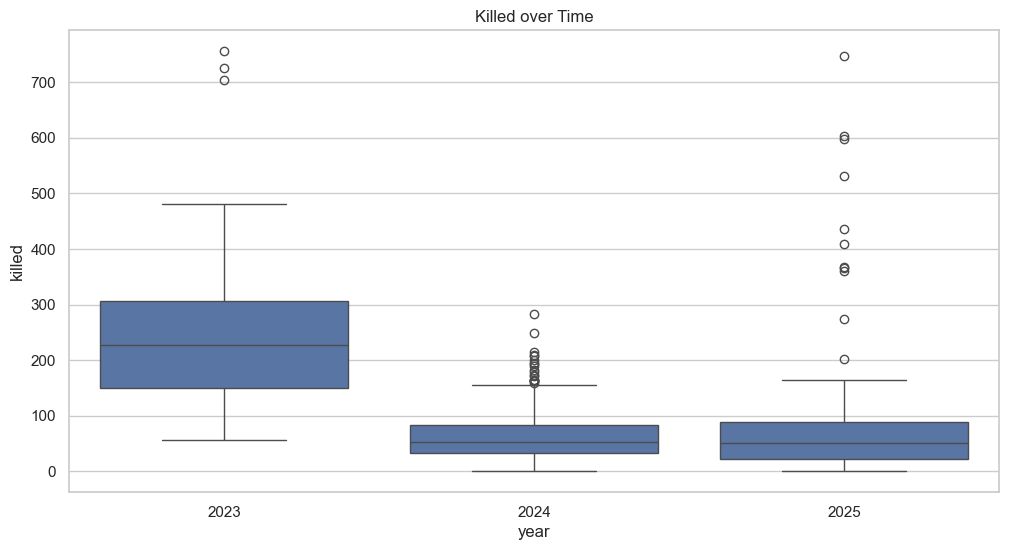

In [54]:
plt.figure(figsize=(12,6))
sns.boxplot(x="year", y="killed", data=df)
plt.title("Killed over Time")
plt.show()
# notice that the year 2023 has biggest number of killed

# Visualize the relation between month and number of killed

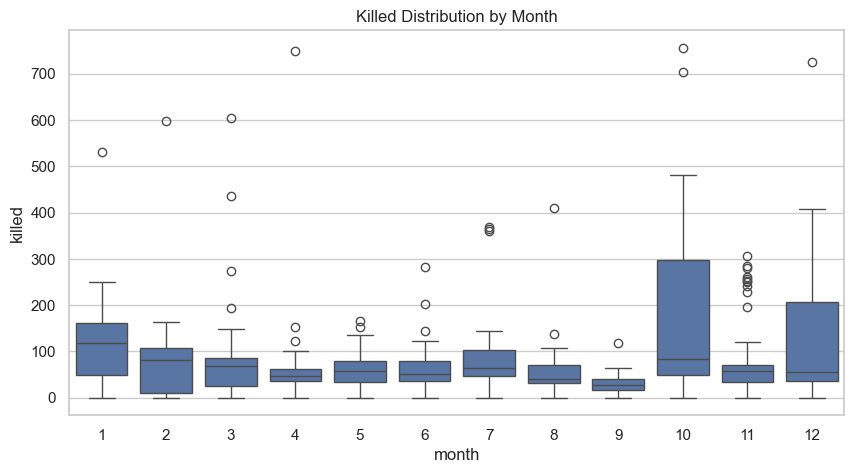

In [55]:
plt.figure(figsize=(10,5))
sns.boxplot(x="month", y="killed", data=df)
plt.title("Killed Distribution by Month")
plt.show()
# notice that the month 10 & 12 have biggest number of killed

# Visualize the relation between month and number of killed

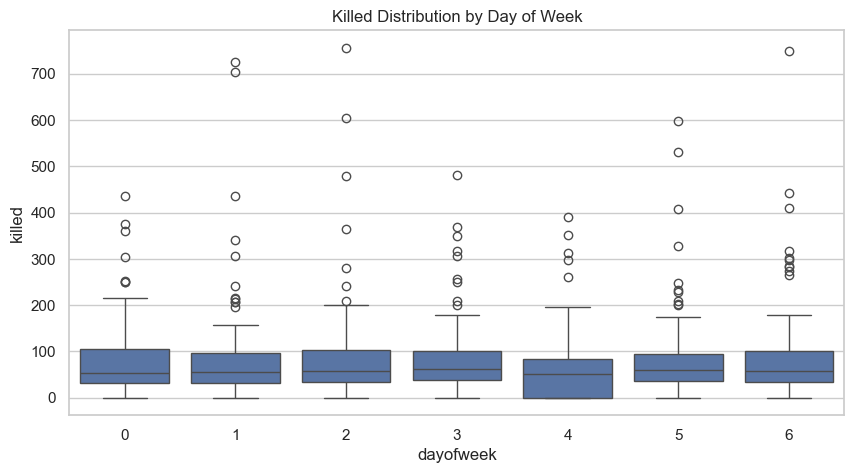

In [56]:
plt.figure(figsize=(10,5))
sns.boxplot(x="dayofweek", y="killed", data=df)
plt.title("Killed Distribution by Day of Week")
plt.show()
# I fill that its not useful

## EDA

# 1. UNivariate Analysis

I noticed that columns killed,ext_killed,ext_injured has positive skewness and columns killed_cum,ext_killed_cum,ext_killed_children_cum,ext_killed,women_cum,ext_press_killed_cum has negative skewness and columns injured_cum,ext_injured_cum has normal distribution

# Numerical

Histogram

Most numeric features are right-skewed with extreme outliers.  
Several categorical features are imbalanced (e.g., report_source).

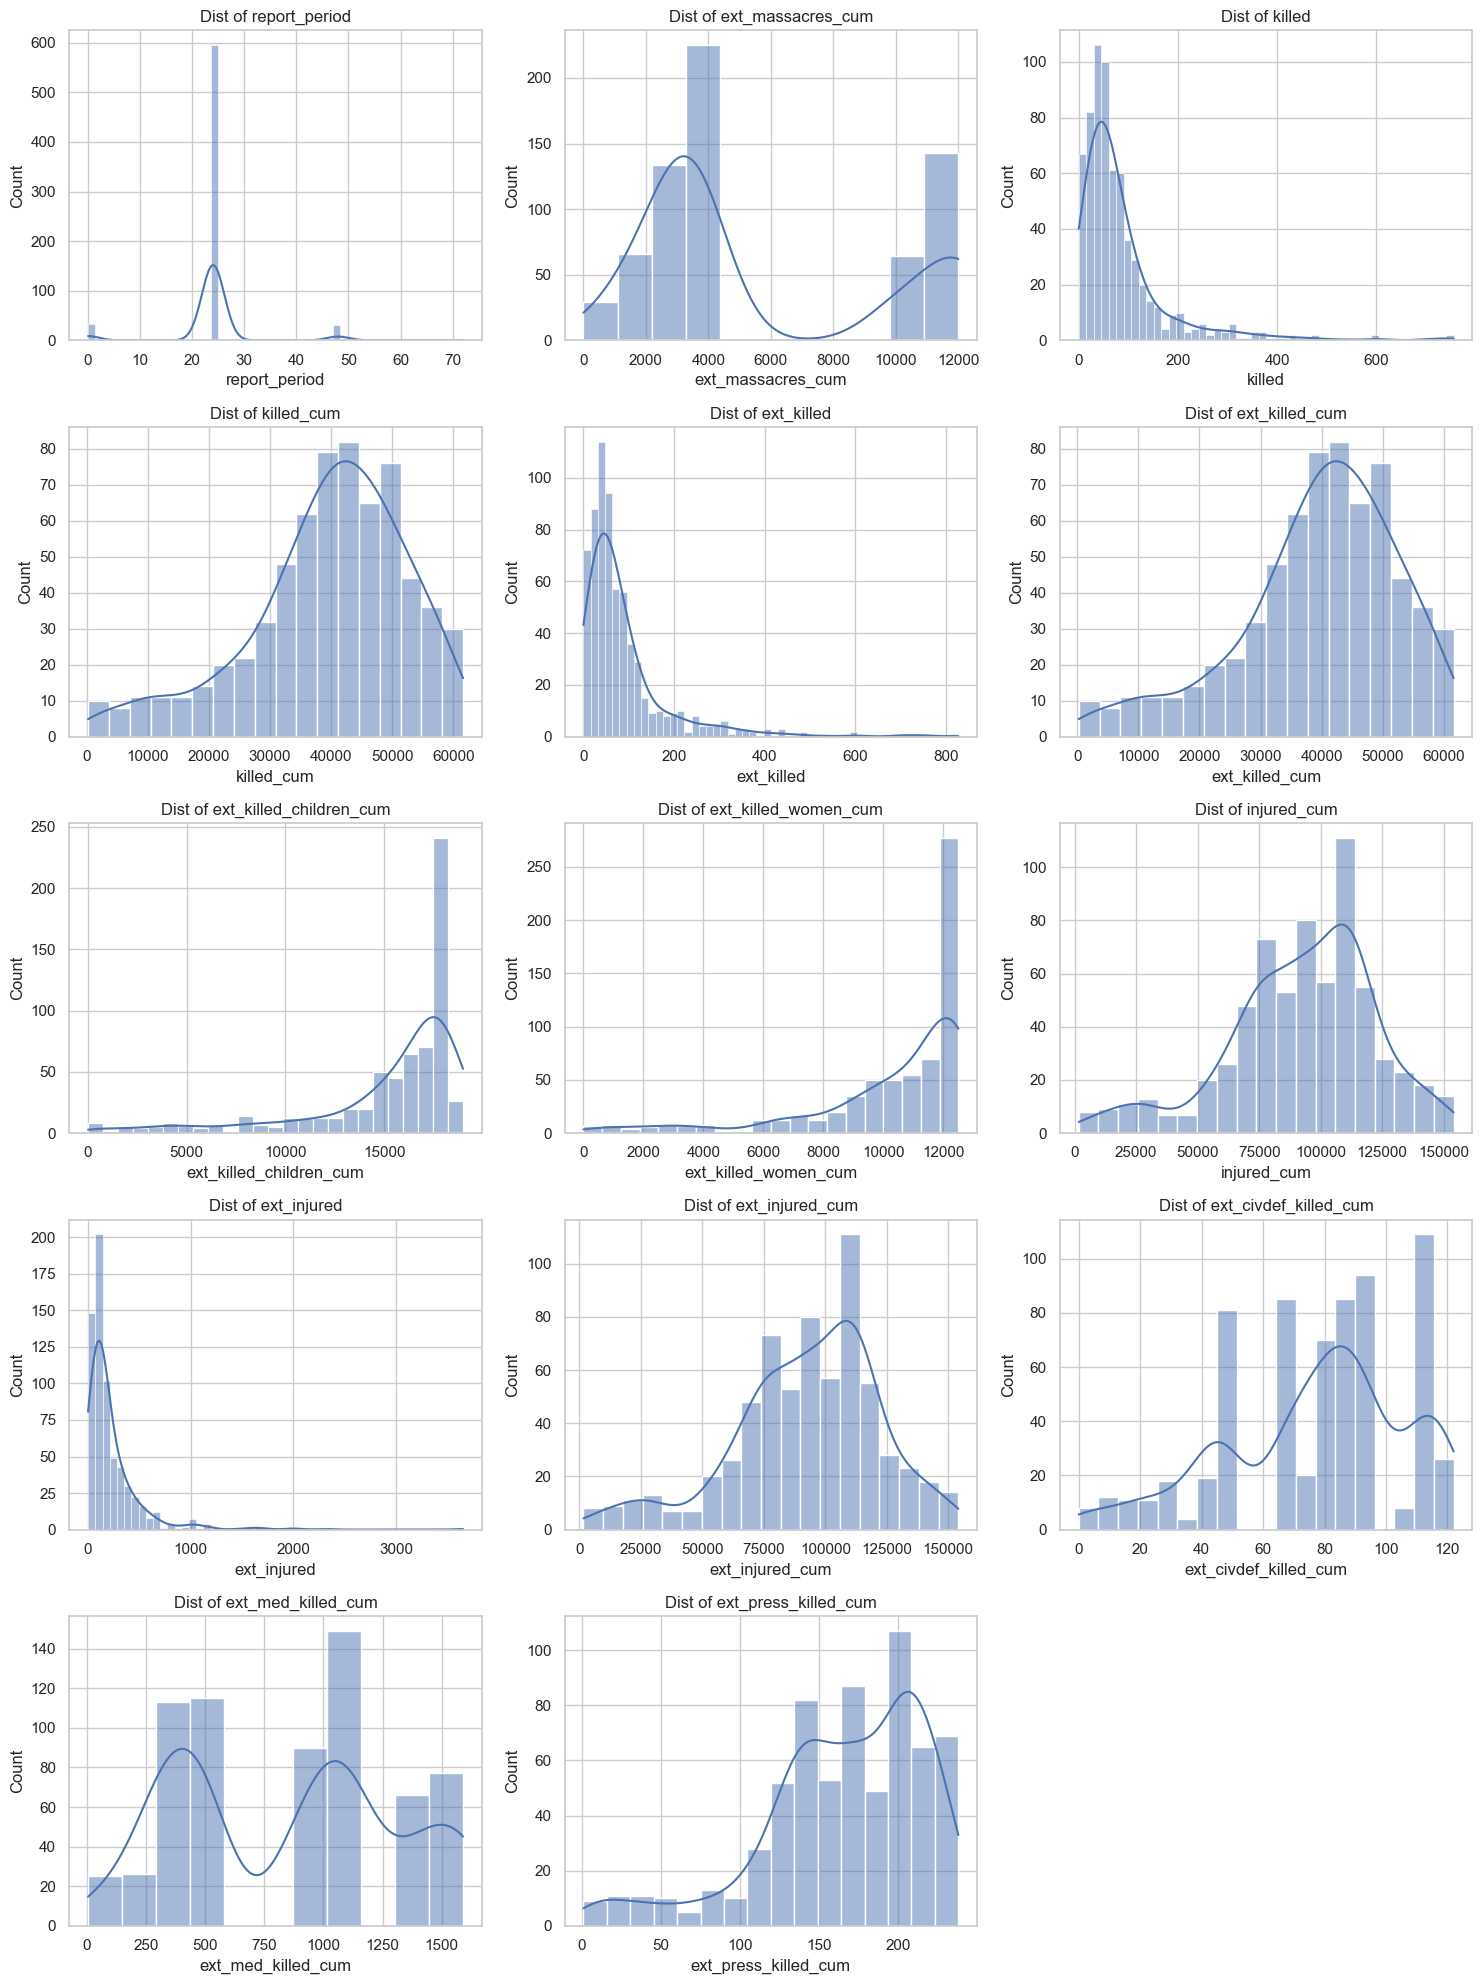

In [57]:
import math
rows = math.ceil(len(nums_columns) / 3)
plt.figure(figsize=(15, rows*4))
for i, col in enumerate(nums_columns, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(df[col], kde=True, color=my_colors)
    plt.title(f"Dist of {col}")
plt.tight_layout()
plt.show()

Box plot

this tell me the range of values in each column 

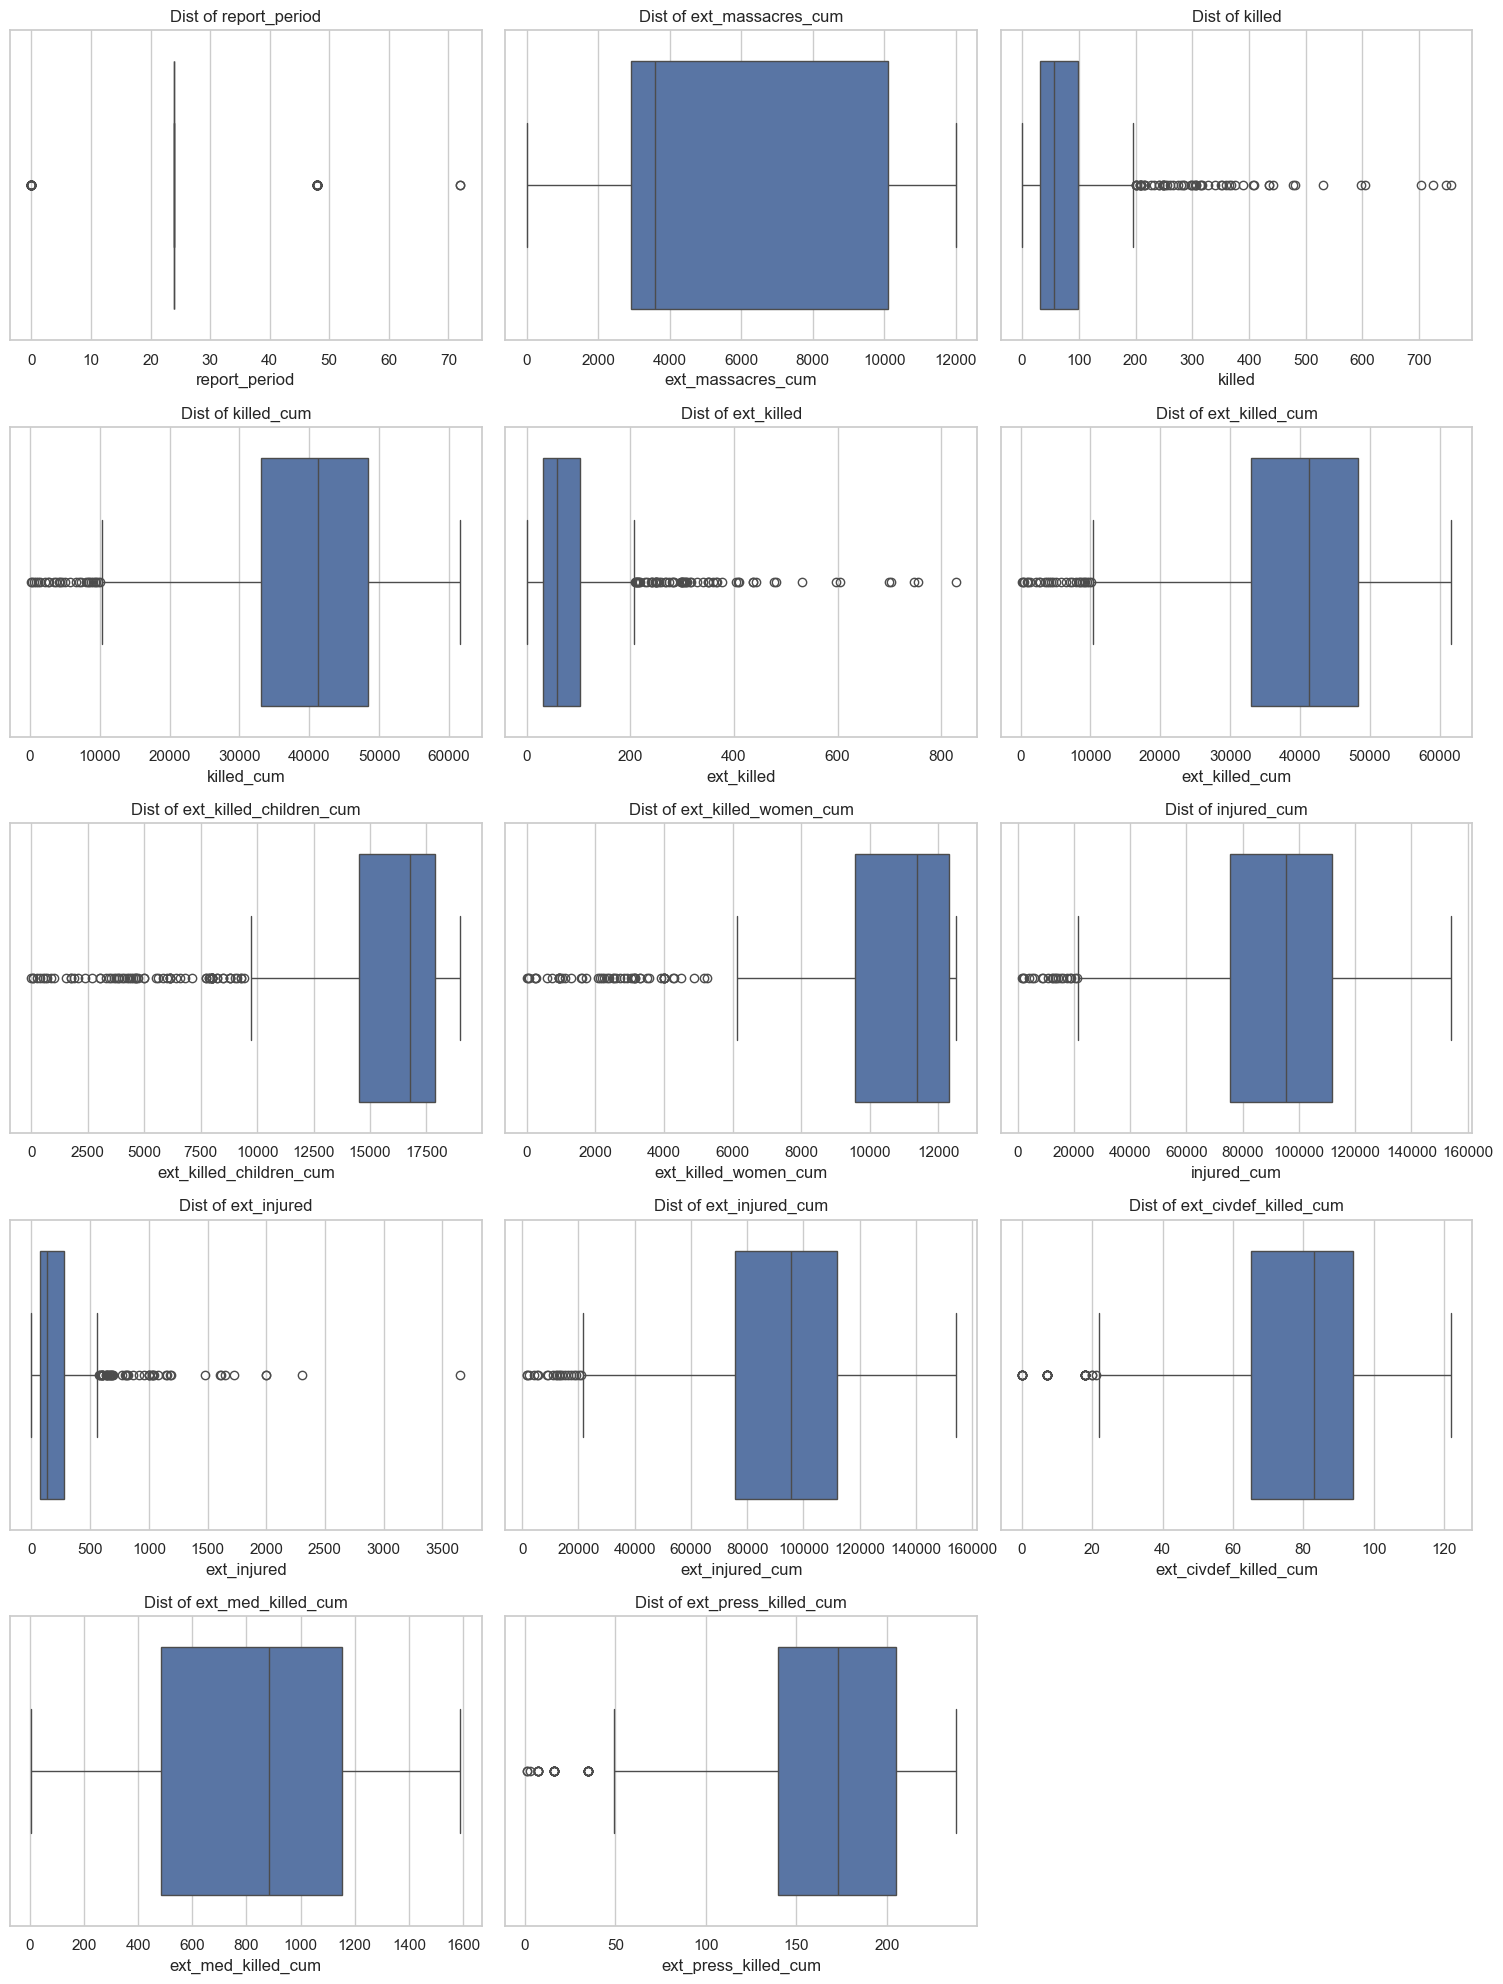

In [58]:
rows = math.ceil(len(nums_columns) / 3)
plt.figure(figsize=(15, rows*4))
for i, col in enumerate(nums_columns, 1):
    plt.subplot(rows, 3, i)
    sns.boxplot(x=df[col], color=my_colors)
    plt.title(f"Dist of {col}")
plt.tight_layout()
plt.show()

# Categorical

count plot

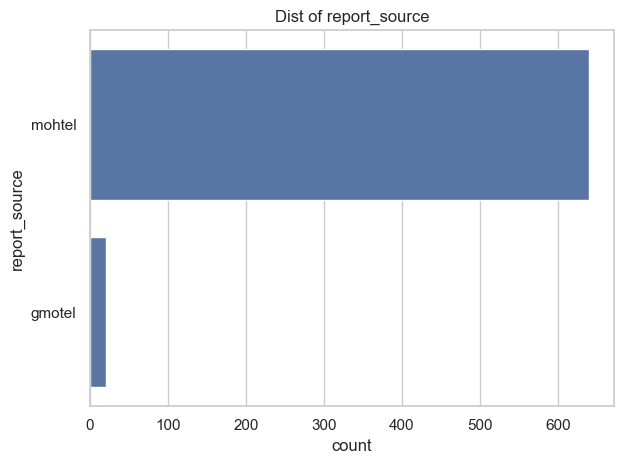

In [80]:
sns.countplot(df["report_source"], color=my_colors)
plt.title(f"Dist of {col}")
plt.tight_layout()
plt.show()

Bar plot

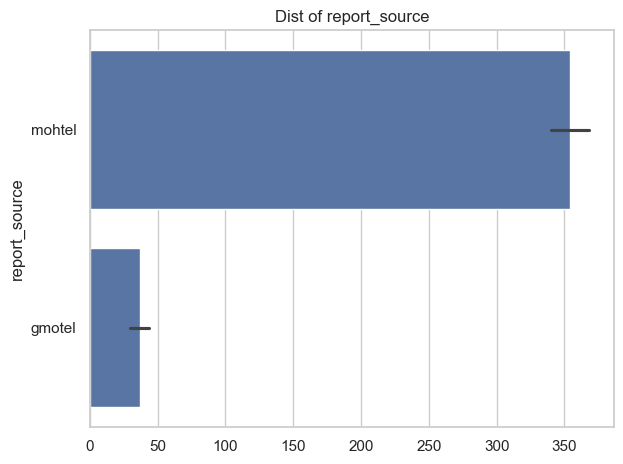

In [77]:
sns.barplot(df["report_source"], color=my_colors)
plt.title(f"Dist of {col}")
plt.tight_layout()
plt.show()

Pie chart

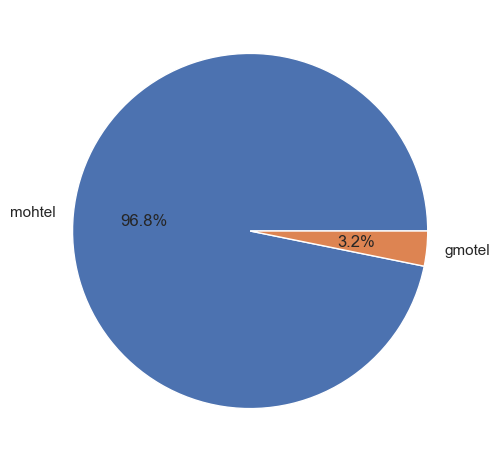

In [79]:
counts=df["report_source"].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.tight_layout()
plt.show()

# 2. Bivariate Analysis

scatter plot (Num v& Num)

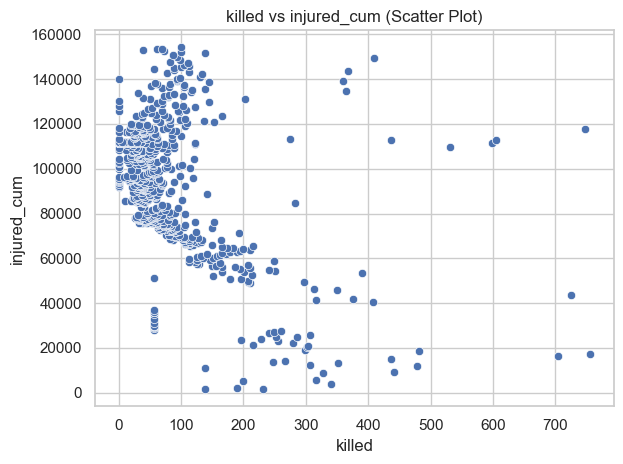

In [62]:
sns.scatterplot(x='killed', y='injured_cum', data=df,  palette=my_colors)
plt.title('killed vs injured_cum (Scatter Plot)')
plt.xlabel('killed')
plt.ylabel('injured_cum')
plt.tight_layout()
plt.show()

line plot (Num & Num)

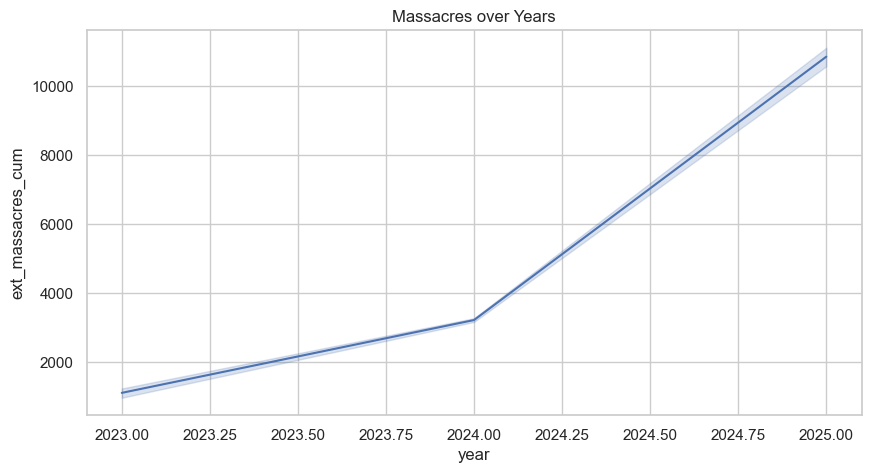

In [63]:
plt.figure(figsize=(10,5))
sns.lineplot(x='year', y='ext_massacres_cum', data=df)
plt.title("Massacres over Years")
plt.show()

Box plot (Cat & Num)

“Months show different medians; spikes in late-year months

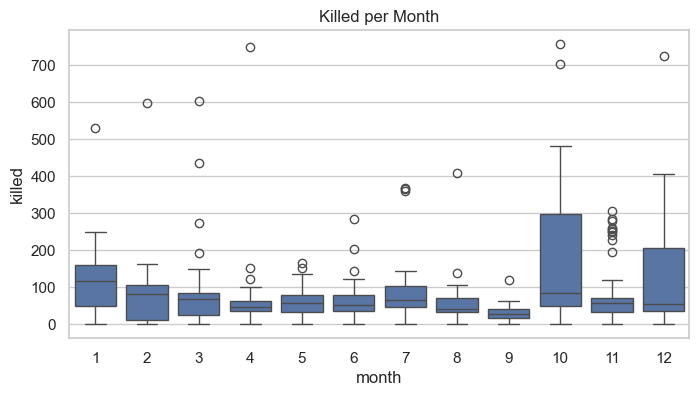

In [64]:
plt.figure(figsize=(8,4))
sns.boxplot(x='month', y='killed', data=df)
plt.title("Killed per Month")
plt.show()

Violin plot (Cat & Num)

“Some sources report consistently higher injuries (possible methodology/access bias).”

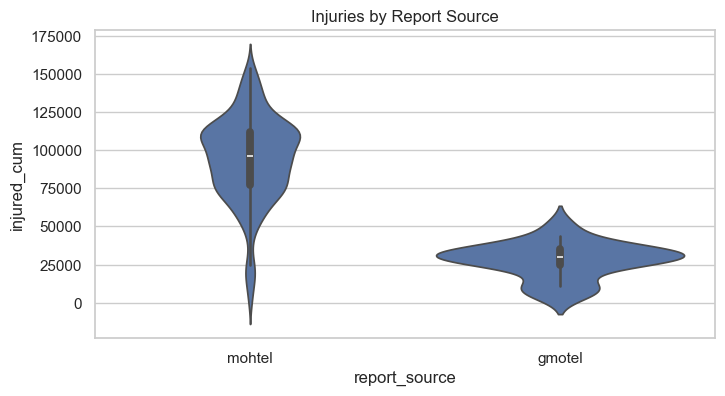

In [65]:
plt.figure(figsize=(8,4))
sns.violinplot(x='report_source', y='injured_cum', data=df)
plt.title("Injuries by Report Source")
plt.show()

Box plot ( Cat & Num)

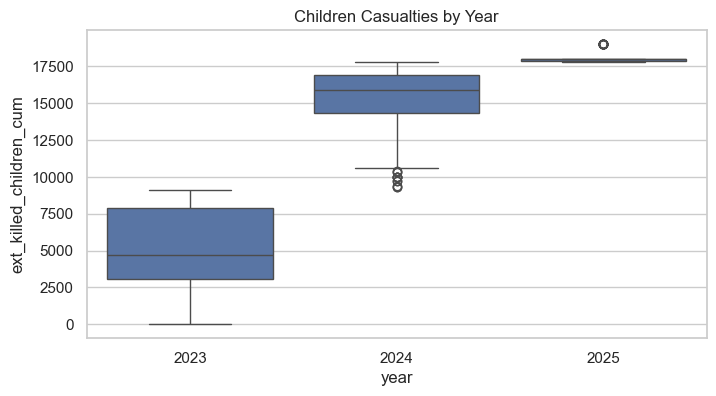

In [66]:
plt.figure(figsize=(8,4))
sns.boxplot(x='year', y='ext_killed_children_cum', data=df)
plt.title("Children Casualties by Year")
plt.show()

# Count plot (Cat & Cat )

“Source activity varies by year; consider normalizing by total reports per source.”

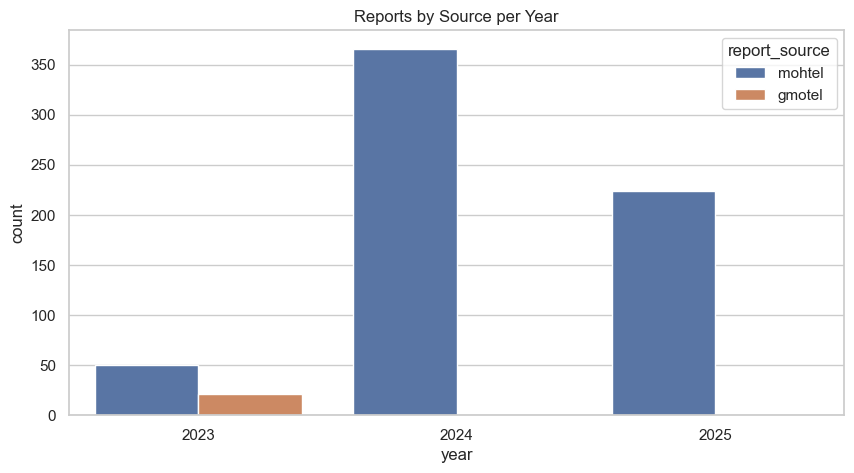

In [67]:
plt.figure(figsize=(10,5))
sns.countplot(x='year', hue='report_source', data=df)
plt.title("Reports by Source per Year")
plt.show()

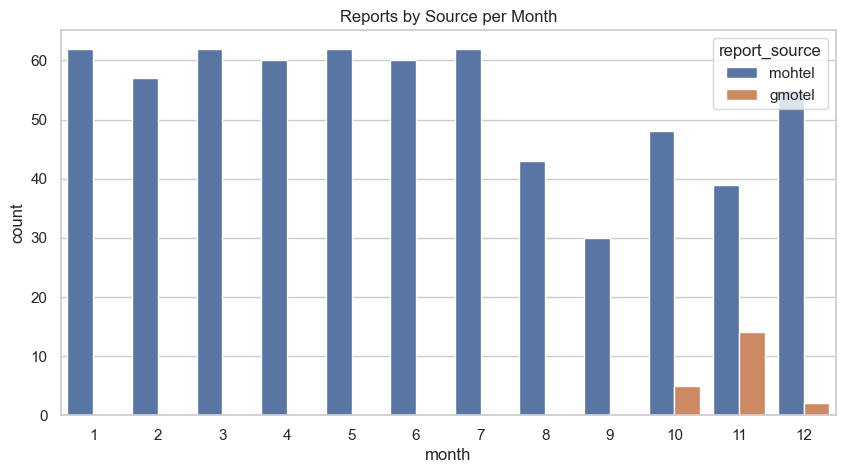

In [68]:
plt.figure(figsize=(10,5))
sns.countplot(x='month', hue='report_source', data=df)
plt.title("Reports by Source per Month")
plt.show()

# Corrolation to the Numerical columns by Sperman method

Top correlations (|ρ| ≥ 0.7): killed ~ injured_cum (positive).  
Cumulative features highly correlated with each other → potential redundancy.  
Consider keeping one representative per highly collinear group.

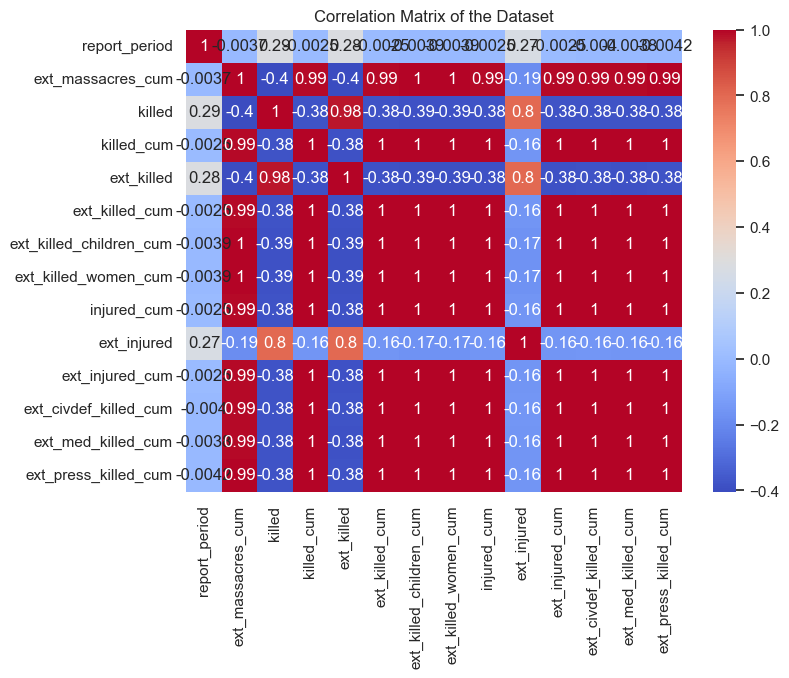

In [69]:
corr = df[nums_columns].corr(method='spearman')
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of the Dataset')
plt.show()

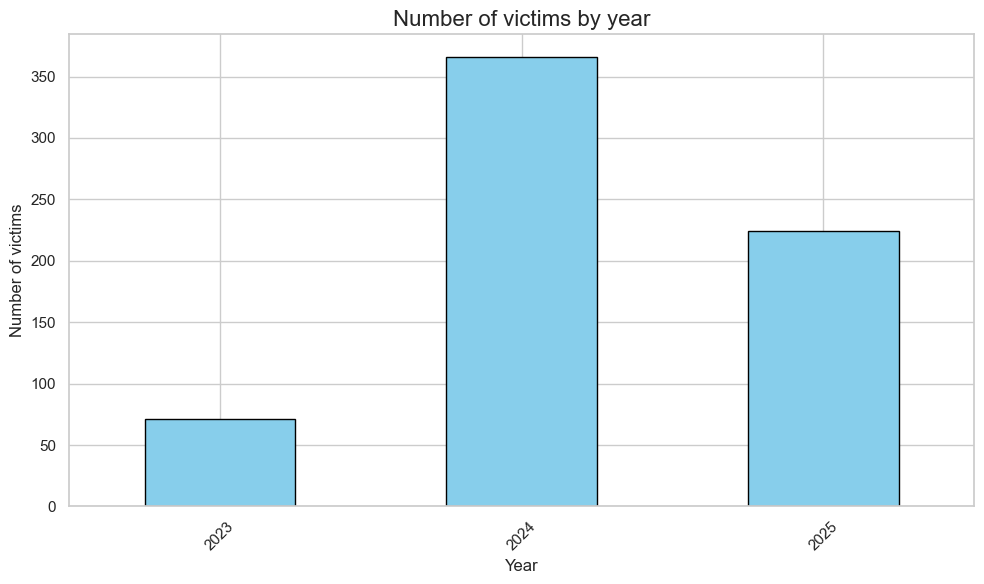

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
df.groupby('year').size().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Number of victims by year", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Number of victims")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("deaths_per_year.png", dpi=300)
plt.show()


**Observation:** A clear pattern emerges in the distribution of martyrs across months, with peaks in certain months reflecting major events or attacks in concentrated time periods, while the remaining months are relatively lower.

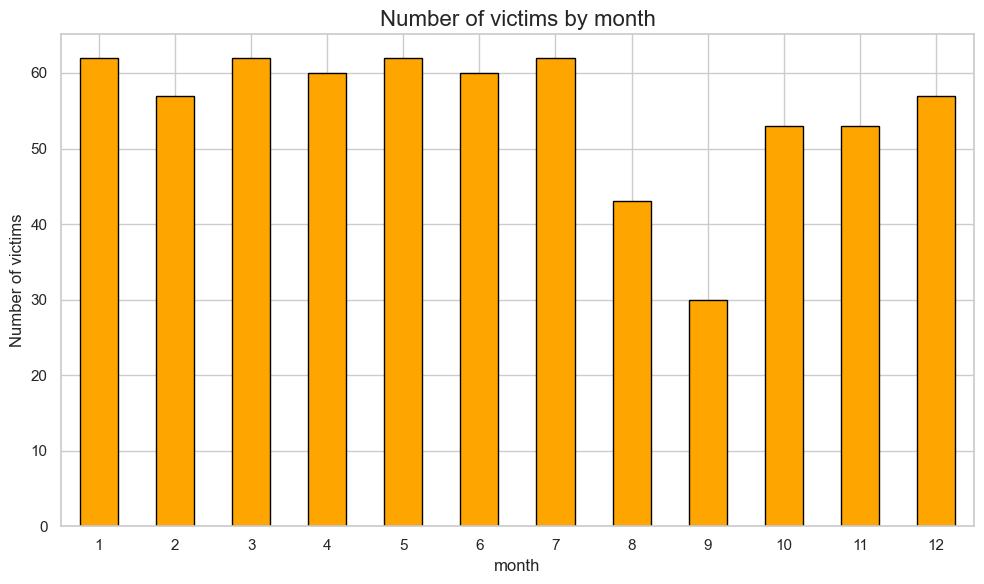

In [71]:
plt.figure(figsize=(10,6))
df.groupby('month').size().plot(kind='bar', color='orange', edgecolor='black')
plt.title("Number of victims by month", fontsize=16)
plt.xlabel("month")
plt.ylabel("Number of victims")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("deaths_per_month.png", dpi=300)
plt.show()


**Observation:** A clear pattern emerges in the distribution of martyrs across months, with peaks in certain months reflecting major events or attacks in concentrated time periods, while the remaining months are relatively lower.

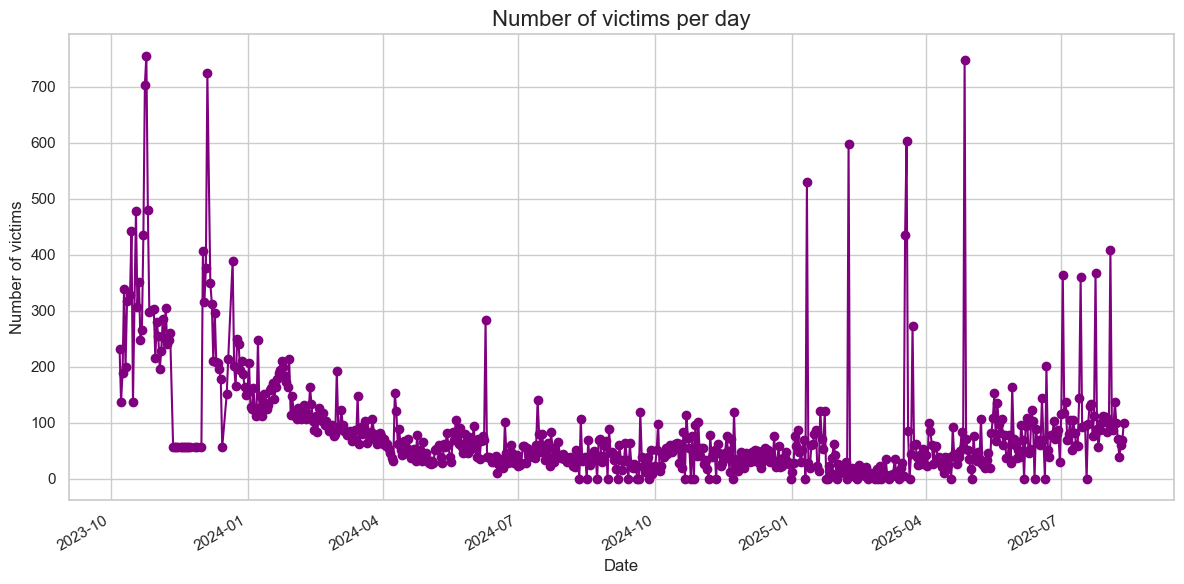

In [72]:
df['report_date'] = pd.to_datetime(df['report_date'], errors='coerce')

daily = df.groupby('report_date')['killed'].sum()

plt.figure(figsize=(12,6))
daily.plot(kind='line', marker='o', color='purple')
plt.title("Number of victims per day", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Number of victims")
plt.tight_layout()
plt.savefig("daily_trend.png", dpi=300)
plt.show()


**Observation:** There are clear daily peaks indicating days of mass killings, while there remains a steady rate of daily casualties, indicating that the violence was not sporadic but ongoing.

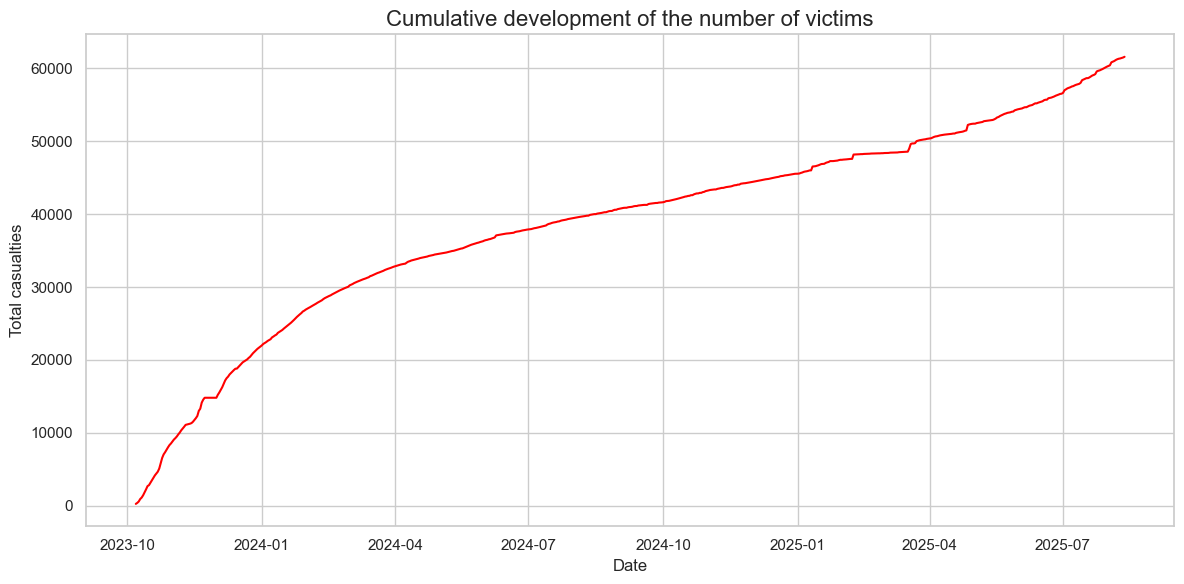

In [73]:
plt.figure(figsize=(12,6))
plt.plot(df['report_date'], df['killed_cum'], color='red')
plt.title("Cumulative development of the number of victims", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Total casualties")
plt.tight_layout()
plt.savefig("cumulative_killed.png", dpi=300)
plt.show()


**Observation:** The cumulative curve shows an accelerating increase in the number of martyrs over time, especially since the onset of the recent events, confirming that the pace of violence is constantly increasing.

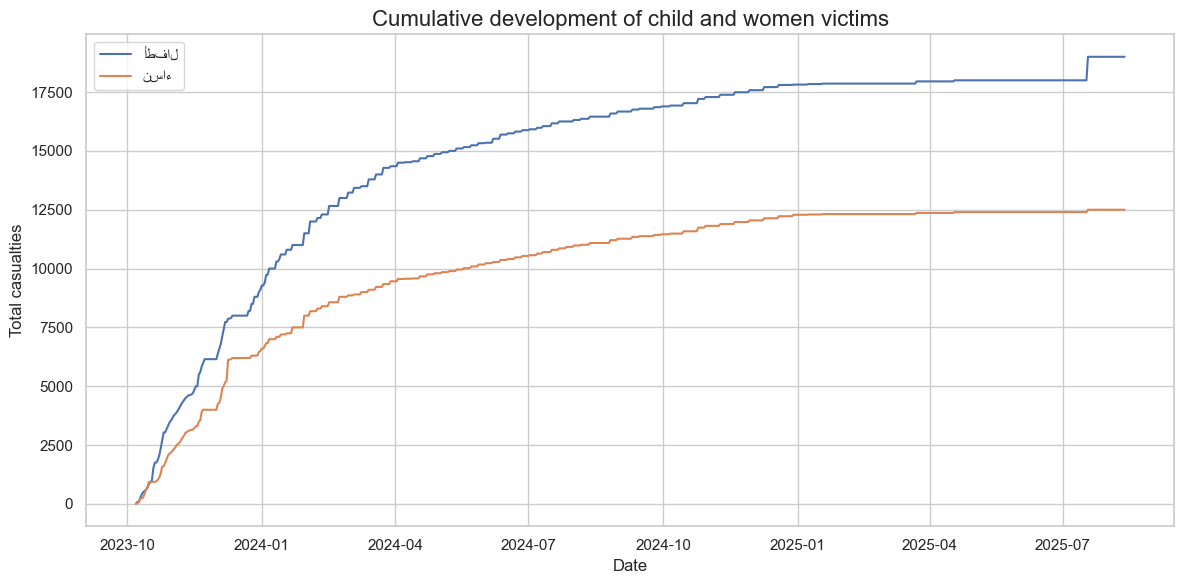

In [74]:
plt.figure(figsize=(12,6))
plt.plot(df['report_date'], df['ext_killed_children_cum'], label='أطفال')
plt.plot(df['report_date'], df['ext_killed_women_cum'], label='نساء')
plt.title("Cumulative development of child and women victims", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Total casualties")
plt.legend()
plt.tight_layout()
plt.savefig("children_women_cumulative.png", dpi=300)
plt.show()


**Observation:** We note that a large proportion of the total number of martyrs are children and women, reflecting the direct targeting of civilians and highlighting the catastrophic humanitarian dimension of the events.

- Casualties are highly skewed: most days small, few days extreme (outliers dominate totals).
- Strong positive relationship between deaths and injuries (operationally intuitive).
- Seasonality: late-year months show higher median deaths.
- Day-of-week adds little signal (flat) → dropped.
- Reporting differences by source suggest methodological biases; handle with caution in modeling.